#### https://mp.weixin.qq.com/s/yh6s-8bNonJjgv97HOFsFg

In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.base import BacktestingMode
# from vnpy.app.cta_strategy.strategies.atr_rsi_strategy import AtrRsiStrategy
from vnpy.app.cta_strategy.strategies.predict_by_volume import (
    PredictByVolumeStrategy,
)
# from break_out_strategy import  BreakOutStrategy
from datetime import datetime

In [5]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="bu2006.SHFE",
    interval="1m",
    start=datetime(2020, 4, 1),
    end=datetime(2020, 4, 27),
    rate=1/10000,
    slippage=0,
    size=10,
    pricetick=2,
    capital=20000,
    mode=BacktestingMode.TICK
)
engine.add_strategy(PredictByVolumeStrategy, {})

2020-04-27 22:09:31.295132	开始加载历史数据
2020-04-27 22:12:07.894368	加载进度：########## [100%]
2020-04-27 22:12:07.894368	历史数据加载完成，数据量：355109
2020-04-27 22:12:11.458840	策略初始化完成
2020-04-27 22:12:11.458840	开始回放历史数据
2020-04-27 22:13:42.533954	历史数据回放结束
2020-04-27 22:13:42.534952	开始计算逐日盯市盈亏
2020-04-27 22:13:42.552271	逐日盯市盈亏计算完成
2020-04-27 22:13:42.552271	开始计算策略统计指标
2020-04-27 22:13:42.570223	------------------------------
2020-04-27 22:13:42.571220	首个交易日：	2020-04-09
2020-04-27 22:13:42.571220	最后交易日：	2020-04-24
2020-04-27 22:13:42.571220	总交易日：	12
2020-04-27 22:13:42.571220	盈利交易日：	2
2020-04-27 22:13:42.571220	亏损交易日：	9
2020-04-27 22:13:42.571220	起始资金：	20,000.00
2020-04-27 22:13:42.571220	结束资金：	17,823.39
2020-04-27 22:13:42.571220	总收益率：	-10.88%
2020-04-27 22:13:42.571220	年化收益：	-217.66%
2020-04-27 22:13:42.571220	最大回撤: 	-1,897.53
2020-04-27 22:13:42.571220	百分比最大回撤: -9.62%
2020-04-27 22:13:42.571220	最长回撤天数: 	15
2020-04-27 22:13:42.571220	总盈亏：	-2,176.61
2020-04-27 22:13:42.571220	总手续费：	436.61
2020-04-27 22

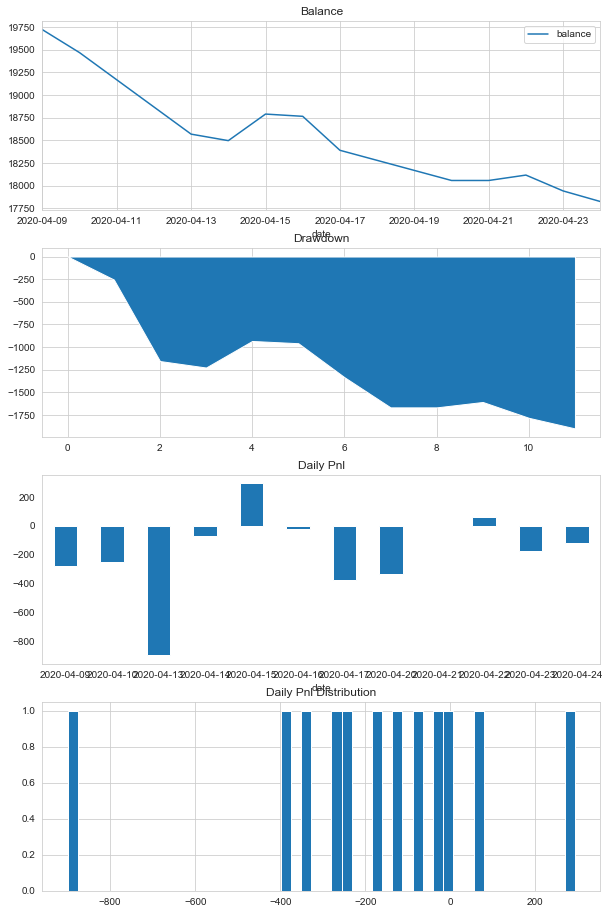

In [6]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [7]:
trades = engine.trades
for value in trades.values():
    print("时间:",value.datetime,value.direction.value,value.offset.value, "价格：",value.price, "数量：",value.volume)
    if value.offset.value == "平":
        print("---------------------------------------------------------")

时间: 2020-04-09 09:05:01 多 开 价格： 2168.0 数量： 1
时间: 2020-04-09 09:05:17.500000 多 开 价格： 2166.0 数量： 1
时间: 2020-04-09 09:05:37 空 平 价格： 2162.0 数量： 1
---------------------------------------------------------
时间: 2020-04-09 09:05:59 多 开 价格： 2162.0 数量： 1
时间: 2020-04-09 09:06:01 空 平 价格： 2160.0 数量： 1
---------------------------------------------------------
时间: 2020-04-09 09:06:09.500000 空 开 价格： 2164.0 数量： 1
时间: 2020-04-09 09:06:27.500000 多 平 价格： 2170.0 数量： 1
---------------------------------------------------------
时间: 2020-04-09 09:06:34 多 开 价格： 2168.0 数量： 1
时间: 2020-04-09 09:07:49.500000 空 开 价格： 2172.0 数量： 1
时间: 2020-04-09 09:09:26.500000 多 平 价格： 2178.0 数量： 1
---------------------------------------------------------
时间: 2020-04-09 09:10:18.500000 空 平 价格： 2174.0 数量： 1
---------------------------------------------------------
时间: 2020-04-09 09:10:25.500000 空 平 价格： 2172.0 数量： 1
---------------------------------------------------------
时间: 2020-04-09 09:11:10 空 开 价格： 2178.0 数量： 1
时间: 2020-04-09 09:

In [7]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio") # total_return,sharpe_ratio
setting.add_parameter("renkoHeight", 0.001, 0.003, 0.0004)
setting.add_parameter("maS", 4, 10, 1)
setting.add_parameter("maL", 7, 21, 2)

engine.run_ga_optimization(setting)

2019-12-05 13:51:05.290564	参数优化空间：280
2019-12-05 13:51:05.290564	每代族群总数：100
2019-12-05 13:51:05.290564	优良筛选个数：80
2019-12-05 13:51:05.290564	迭代次数：30
2019-12-05 13:51:05.290564	交叉概率：95%
2019-12-05 13:51:05.290564	突变概率：5%
2019-12-05 13:51:05.291561	开始加载历史数据
2019-12-05 13:51:05.291561	加载进度： [7%]
2019-12-05 13:51:05.291561	加载进度：# [14%]
2019-12-05 13:51:05.291561	加载进度：## [21%]
2019-12-05 13:51:05.291561	加载进度：## [28%]
2019-12-05 13:51:05.291561	加载进度：### [35%]
2019-12-05 13:51:05.291561	加载进度：#### [43%]
2019-12-05 13:51:05.291561	加载进度：#### [50%]
2019-12-05 13:51:05.291561	加载进度：##### [57%]
2019-12-05 13:51:05.291561	加载进度：###### [64%]
2019-12-05 13:51:05.291561	加载进度：####### [71%]
2019-12-05 13:51:05.291561	加载进度：####### [78%]
2019-12-05 13:51:05.291561	加载进度：######## [85%]
2019-12-05 13:51:05.291561	加载进度：######### [92%]
2019-12-05 13:51:05.304527	加载进度：######### [99%]
2019-12-05 13:51:05.305523	加载进度：########## [100%]
2019-12-05 13:51:05.305523	历史数据加载完成，数据量：456490
2019-12-05 13:51:05.589762	策略初始化完成
2

d:\Anaconda3\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:380: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


2019-12-05 13:51:26.949622	策略初始化完成
2019-12-05 13:51:26.950619	开始回放历史数据
2019-12-05 13:51:31.826576	历史数据回放结束
2019-12-05 13:51:31.827572	开始计算逐日盯市盈亏
2019-12-05 13:51:31.829567	逐日盯市盈亏计算完成
2019-12-05 13:51:31.830564	开始计算策略统计指标
2019-12-05 13:51:31.840538	开始加载历史数据
2019-12-05 13:51:31.840538	加载进度： [7%]
2019-12-05 13:51:31.840538	加载进度：# [14%]
2019-12-05 13:51:31.840538	加载进度：## [21%]
2019-12-05 13:51:31.841550	加载进度：## [28%]
2019-12-05 13:51:31.841550	加载进度：### [35%]
2019-12-05 13:51:31.841550	加载进度：#### [43%]
2019-12-05 13:51:31.841550	加载进度：#### [50%]
2019-12-05 13:51:31.841550	加载进度：##### [57%]
2019-12-05 13:51:31.841550	加载进度：###### [64%]
2019-12-05 13:51:31.842533	加载进度：####### [71%]
2019-12-05 13:51:31.842533	加载进度：####### [78%]
2019-12-05 13:51:31.842533	加载进度：######## [85%]
2019-12-05 13:51:31.842533	加载进度：######### [92%]
2019-12-05 13:51:31.851508	加载进度：######### [99%]
2019-12-05 13:51:31.851508	加载进度：########## [100%]
2019-12-05 13:51:31.851508	历史数据加载完成，数据量：456490
2019-12-05 13:51:31.998116	策略初始化完成

2019-12-05 13:52:13.792389	策略初始化完成
2019-12-05 13:52:13.793387	开始回放历史数据
2019-12-05 13:52:18.913969	历史数据回放结束
2019-12-05 13:52:18.914967	开始计算逐日盯市盈亏
2019-12-05 13:52:18.919953	逐日盯市盈亏计算完成
2019-12-05 13:52:18.919953	开始计算策略统计指标
2019-12-05 13:52:18.926934	开始加载历史数据
2019-12-05 13:52:18.927931	加载进度： [7%]
2019-12-05 13:52:18.927931	加载进度：# [14%]
2019-12-05 13:52:18.927931	加载进度：## [21%]
2019-12-05 13:52:18.927931	加载进度：## [28%]
2019-12-05 13:52:18.927931	加载进度：### [35%]
2019-12-05 13:52:18.928928	加载进度：#### [43%]
2019-12-05 13:52:18.928928	加载进度：#### [50%]
2019-12-05 13:52:18.928928	加载进度：##### [57%]
2019-12-05 13:52:18.928928	加载进度：###### [64%]
2019-12-05 13:52:18.928928	加载进度：####### [71%]
2019-12-05 13:52:18.929926	加载进度：####### [78%]
2019-12-05 13:52:18.929926	加载进度：######## [85%]
2019-12-05 13:52:18.929926	加载进度：######### [92%]
2019-12-05 13:52:18.938903	加载进度：######### [99%]
2019-12-05 13:52:18.938903	加载进度：########## [100%]
2019-12-05 13:52:18.938903	历史数据加载完成，数据量：456490
2019-12-05 13:52:19.164299	策略初始化完成

2019-12-05 13:53:02.355453	策略初始化完成
2019-12-05 13:53:02.355453	开始回放历史数据
2019-12-05 13:53:07.278285	历史数据回放结束
2019-12-05 13:53:07.279281	开始计算逐日盯市盈亏
2019-12-05 13:53:07.281285	逐日盯市盈亏计算完成
2019-12-05 13:53:07.281285	开始计算策略统计指标
2019-12-05 13:53:07.291249	开始加载历史数据
2019-12-05 13:53:07.291249	加载进度： [7%]
2019-12-05 13:53:07.291249	加载进度：# [14%]
2019-12-05 13:53:07.291249	加载进度：## [21%]
2019-12-05 13:53:07.291249	加载进度：## [28%]
2019-12-05 13:53:07.291249	加载进度：### [35%]
2019-12-05 13:53:07.291249	加载进度：#### [43%]
2019-12-05 13:53:07.292247	加载进度：#### [50%]
2019-12-05 13:53:07.292247	加载进度：##### [57%]
2019-12-05 13:53:07.293244	加载进度：###### [64%]
2019-12-05 13:53:07.293244	加载进度：####### [71%]
2019-12-05 13:53:07.293244	加载进度：####### [78%]
2019-12-05 13:53:07.293244	加载进度：######## [85%]
2019-12-05 13:53:07.294255	加载进度：######### [92%]
2019-12-05 13:53:07.303217	加载进度：######### [99%]
2019-12-05 13:53:07.303217	加载进度：########## [100%]
2019-12-05 13:53:07.303217	历史数据加载完成，数据量：456490
2019-12-05 13:53:07.436859	策略初始化完成

2019-12-05 13:53:51.269825	策略初始化完成
2019-12-05 13:53:51.269825	开始回放历史数据
2019-12-05 13:53:56.229558	历史数据回放结束
2019-12-05 13:53:56.230554	开始计算逐日盯市盈亏
2019-12-05 13:53:56.232549	逐日盯市盈亏计算完成
2019-12-05 13:53:56.232549	开始计算策略统计指标
2019-12-05 13:53:56.240528	开始加载历史数据
2019-12-05 13:53:56.240528	加载进度： [7%]
2019-12-05 13:53:56.241525	加载进度：# [14%]
2019-12-05 13:53:56.241525	加载进度：## [21%]
2019-12-05 13:53:56.241525	加载进度：## [28%]
2019-12-05 13:53:56.241525	加载进度：### [35%]
2019-12-05 13:53:56.242524	加载进度：#### [43%]
2019-12-05 13:53:56.242524	加载进度：#### [50%]
2019-12-05 13:53:56.242524	加载进度：##### [57%]
2019-12-05 13:53:56.242524	加载进度：###### [64%]
2019-12-05 13:53:56.242524	加载进度：####### [71%]
2019-12-05 13:53:56.243520	加载进度：####### [78%]
2019-12-05 13:53:56.243520	加载进度：######## [85%]
2019-12-05 13:53:56.243520	加载进度：######### [92%]
2019-12-05 13:53:56.251498	加载进度：######### [99%]
2019-12-05 13:53:56.251498	加载进度：########## [100%]
2019-12-05 13:53:56.251498	历史数据加载完成，数据量：456490
2019-12-05 13:53:56.381152	策略初始化完成

2019-12-05 13:54:38.459349	策略初始化完成
2019-12-05 13:54:38.459349	开始回放历史数据
2019-12-05 13:54:43.640489	历史数据回放结束
2019-12-05 13:54:43.641489	开始计算逐日盯市盈亏
2019-12-05 13:54:43.643453	逐日盯市盈亏计算完成
2019-12-05 13:54:43.644450	开始计算策略统计指标
2019-12-05 13:54:43.653426	开始加载历史数据
2019-12-05 13:54:43.653426	加载进度： [7%]
2019-12-05 13:54:43.654423	加载进度：# [14%]
2019-12-05 13:54:43.654423	加载进度：## [21%]
2019-12-05 13:54:43.654423	加载进度：## [28%]
2019-12-05 13:54:43.654423	加载进度：### [35%]
2019-12-05 13:54:43.654423	加载进度：#### [43%]
2019-12-05 13:54:43.654423	加载进度：#### [50%]
2019-12-05 13:54:43.654423	加载进度：##### [57%]
2019-12-05 13:54:43.654423	加载进度：###### [64%]
2019-12-05 13:54:43.654423	加载进度：####### [71%]
2019-12-05 13:54:43.654423	加载进度：####### [78%]
2019-12-05 13:54:43.654423	加载进度：######## [85%]
2019-12-05 13:54:43.654423	加载进度：######### [92%]
2019-12-05 13:54:43.663399	加载进度：######### [99%]
2019-12-05 13:54:43.663399	加载进度：########## [100%]
2019-12-05 13:54:43.663399	历史数据加载完成，数据量：456490
2019-12-05 13:54:43.890791	策略初始化完成

2019-12-05 13:55:25.660052	策略初始化完成
2019-12-05 13:55:25.660052	开始回放历史数据
2019-12-05 13:55:30.897042	历史数据回放结束
2019-12-05 13:55:30.897042	开始计算逐日盯市盈亏
2019-12-05 13:55:30.905022	逐日盯市盈亏计算完成
2019-12-05 13:55:30.905022	开始计算策略统计指标
2019-12-05 13:55:30.913000	开始加载历史数据
2019-12-05 13:55:30.913000	加载进度： [7%]
2019-12-05 13:55:30.913000	加载进度：# [14%]
2019-12-05 13:55:30.914010	加载进度：## [21%]
2019-12-05 13:55:30.914995	加载进度：## [28%]
2019-12-05 13:55:30.914995	加载进度：### [35%]
2019-12-05 13:55:30.914995	加载进度：#### [43%]
2019-12-05 13:55:30.914995	加载进度：#### [50%]
2019-12-05 13:55:30.914995	加载进度：##### [57%]
2019-12-05 13:55:30.914995	加载进度：###### [64%]
2019-12-05 13:55:30.914995	加载进度：####### [71%]
2019-12-05 13:55:30.914995	加载进度：####### [78%]
2019-12-05 13:55:30.914995	加载进度：######## [85%]
2019-12-05 13:55:30.914995	加载进度：######### [92%]
2019-12-05 13:55:30.924969	加载进度：######### [99%]
2019-12-05 13:55:30.924969	加载进度：########## [100%]
2019-12-05 13:55:30.925966	历史数据加载完成，数据量：456490
2019-12-05 13:55:31.062599	策略初始化完成

2019-12-05 13:56:12.798949	策略初始化完成
2019-12-05 13:56:12.798949	开始回放历史数据
2019-12-05 13:56:18.049903	历史数据回放结束
2019-12-05 13:56:18.049903	开始计算逐日盯市盈亏
2019-12-05 13:56:18.053900	逐日盯市盈亏计算完成
2019-12-05 13:56:18.053900	开始计算策略统计指标
2019-12-05 13:56:18.061895	开始加载历史数据
2019-12-05 13:56:18.062867	加载进度： [7%]
2019-12-05 13:56:18.062867	加载进度：# [14%]
2019-12-05 13:56:18.062867	加载进度：## [21%]
2019-12-05 13:56:18.062867	加载进度：## [28%]
2019-12-05 13:56:18.062867	加载进度：### [35%]
2019-12-05 13:56:18.062867	加载进度：#### [43%]
2019-12-05 13:56:18.062867	加载进度：#### [50%]
2019-12-05 13:56:18.062867	加载进度：##### [57%]
2019-12-05 13:56:18.062867	加载进度：###### [64%]
2019-12-05 13:56:18.062867	加载进度：####### [71%]
2019-12-05 13:56:18.062867	加载进度：####### [78%]
2019-12-05 13:56:18.062867	加载进度：######## [85%]
2019-12-05 13:56:18.062867	加载进度：######### [92%]
2019-12-05 13:56:18.071844	加载进度：######### [99%]
2019-12-05 13:56:18.071844	加载进度：########## [100%]
2019-12-05 13:56:18.071844	历史数据加载完成，数据量：456490
2019-12-05 13:56:18.305219	策略初始化完成

2019-12-05 13:56:59.209794	策略初始化完成
2019-12-05 13:56:59.210806	开始回放历史数据
2019-12-05 13:57:04.099713	历史数据回放结束
2019-12-05 13:57:04.100710	开始计算逐日盯市盈亏
2019-12-05 13:57:04.104700	逐日盯市盈亏计算完成
2019-12-05 13:57:04.104700	开始计算策略统计指标
2019-12-05 13:57:04.112678	开始加载历史数据
2019-12-05 13:57:04.113675	加载进度： [7%]
2019-12-05 13:57:04.113675	加载进度：# [14%]
2019-12-05 13:57:04.113675	加载进度：## [21%]
2019-12-05 13:57:04.113675	加载进度：## [28%]
2019-12-05 13:57:04.114673	加载进度：### [35%]
2019-12-05 13:57:04.114673	加载进度：#### [43%]
2019-12-05 13:57:04.114673	加载进度：#### [50%]
2019-12-05 13:57:04.114673	加载进度：##### [57%]
2019-12-05 13:57:04.114673	加载进度：###### [64%]
2019-12-05 13:57:04.114673	加载进度：####### [71%]
2019-12-05 13:57:04.114673	加载进度：####### [78%]
2019-12-05 13:57:04.114673	加载进度：######## [85%]
2019-12-05 13:57:04.114673	加载进度：######### [92%]
2019-12-05 13:57:04.124647	加载进度：######### [99%]
2019-12-05 13:57:04.124647	加载进度：########## [100%]
2019-12-05 13:57:04.124647	历史数据加载完成，数据量：456490
2019-12-05 13:57:04.255296	策略初始化完成

2019-12-05 13:57:46.312106	策略初始化完成
2019-12-05 13:57:46.312106	开始回放历史数据
2019-12-05 13:57:51.632871	历史数据回放结束
2019-12-05 13:57:51.633869	开始计算逐日盯市盈亏
2019-12-05 13:57:51.636860	逐日盯市盈亏计算完成
2019-12-05 13:57:51.637858	开始计算策略统计指标
2019-12-05 13:57:51.645838	开始加载历史数据
2019-12-05 13:57:51.645838	加载进度： [7%]
2019-12-05 13:57:51.645838	加载进度：# [14%]
2019-12-05 13:57:51.645838	加载进度：## [21%]
2019-12-05 13:57:51.645838	加载进度：## [28%]
2019-12-05 13:57:51.645838	加载进度：### [35%]
2019-12-05 13:57:51.645838	加载进度：#### [43%]
2019-12-05 13:57:51.645838	加载进度：#### [50%]
2019-12-05 13:57:51.645838	加载进度：##### [57%]
2019-12-05 13:57:51.645838	加载进度：###### [64%]
2019-12-05 13:57:51.646835	加载进度：####### [71%]
2019-12-05 13:57:51.646835	加载进度：####### [78%]
2019-12-05 13:57:51.646835	加载进度：######## [85%]
2019-12-05 13:57:51.646835	加载进度：######### [92%]
2019-12-05 13:57:51.656807	加载进度：######### [99%]
2019-12-05 13:57:51.656807	加载进度：########## [100%]
2019-12-05 13:57:51.656807	历史数据加载完成，数据量：456490
2019-12-05 13:57:51.889186	策略初始化完成

2019-12-05 13:58:37.876382	历史数据回放结束
2019-12-05 13:58:37.877379	开始计算逐日盯市盈亏
2019-12-05 13:58:37.881369	逐日盯市盈亏计算完成
2019-12-05 13:58:37.882366	开始计算策略统计指标
2019-12-05 13:58:37.890345	开始加载历史数据
2019-12-05 13:58:37.891342	加载进度： [7%]
2019-12-05 13:58:37.891342	加载进度：# [14%]
2019-12-05 13:58:37.891342	加载进度：## [21%]
2019-12-05 13:58:37.891342	加载进度：## [28%]
2019-12-05 13:58:37.892339	加载进度：### [35%]
2019-12-05 13:58:37.892339	加载进度：#### [43%]
2019-12-05 13:58:37.892339	加载进度：#### [50%]
2019-12-05 13:58:37.892339	加载进度：##### [57%]
2019-12-05 13:58:37.892339	加载进度：###### [64%]
2019-12-05 13:58:37.893336	加载进度：####### [71%]
2019-12-05 13:58:37.893336	加载进度：####### [78%]
2019-12-05 13:58:37.893336	加载进度：######## [85%]
2019-12-05 13:58:37.893336	加载进度：######### [92%]
2019-12-05 13:58:37.902313	加载进度：######### [99%]
2019-12-05 13:58:37.902313	加载进度：########## [100%]
2019-12-05 13:58:37.903309	历史数据加载完成，数据量：456490
2019-12-05 13:58:38.156632	策略初始化完成
2019-12-05 13:58:38.156632	开始回放历史数据
2019-12-05 13:58:43.017628	历史数据回放结

2019-12-05 13:59:24.229381	历史数据回放结束
2019-12-05 13:59:24.230378	开始计算逐日盯市盈亏
2019-12-05 13:59:24.232373	逐日盯市盈亏计算完成
2019-12-05 13:59:24.233370	开始计算策略统计指标
2019-12-05 13:59:24.240353	开始加载历史数据
2019-12-05 13:59:24.240353	加载进度： [7%]
2019-12-05 13:59:24.241350	加载进度：# [14%]
2019-12-05 13:59:24.241350	加载进度：## [21%]
2019-12-05 13:59:24.241350	加载进度：## [28%]
2019-12-05 13:59:24.241350	加载进度：### [35%]
2019-12-05 13:59:24.242346	加载进度：#### [43%]
2019-12-05 13:59:24.242346	加载进度：#### [50%]
2019-12-05 13:59:24.242346	加载进度：##### [57%]
2019-12-05 13:59:24.242346	加载进度：###### [64%]
2019-12-05 13:59:24.242346	加载进度：####### [71%]
2019-12-05 13:59:24.243343	加载进度：####### [78%]
2019-12-05 13:59:24.243343	加载进度：######## [85%]
2019-12-05 13:59:24.243343	加载进度：######### [92%]
2019-12-05 13:59:24.251322	加载进度：######### [99%]
2019-12-05 13:59:24.252320	加载进度：########## [100%]
2019-12-05 13:59:24.252320	历史数据加载完成，数据量：456490
2019-12-05 13:59:24.383968	策略初始化完成
2019-12-05 13:59:24.383968	开始回放历史数据
2019-12-05 13:59:29.297823	历史数据回放结

2019-12-05 14:00:09.791497	历史数据回放结束
2019-12-05 14:00:09.791497	开始计算逐日盯市盈亏
2019-12-05 14:00:09.794489	逐日盯市盈亏计算完成
2019-12-05 14:00:09.794489	开始计算策略统计指标
2019-12-05 14:00:09.803464	开始加载历史数据
2019-12-05 14:00:09.803464	加载进度： [7%]
2019-12-05 14:00:09.804461	加载进度：# [14%]
2019-12-05 14:00:09.804461	加载进度：## [21%]
2019-12-05 14:00:09.804461	加载进度：## [28%]
2019-12-05 14:00:09.804461	加载进度：### [35%]
2019-12-05 14:00:09.804461	加载进度：#### [43%]
2019-12-05 14:00:09.805459	加载进度：#### [50%]
2019-12-05 14:00:09.805459	加载进度：##### [57%]
2019-12-05 14:00:09.805459	加载进度：###### [64%]
2019-12-05 14:00:09.805459	加载进度：####### [71%]
2019-12-05 14:00:09.805459	加载进度：####### [78%]
2019-12-05 14:00:09.805459	加载进度：######## [85%]
2019-12-05 14:00:09.805459	加载进度：######### [92%]
2019-12-05 14:00:09.815433	加载进度：######### [99%]
2019-12-05 14:00:09.815433	加载进度：########## [100%]
2019-12-05 14:00:09.816430	历史数据加载完成，数据量：456490
2019-12-05 14:00:09.951069	策略初始化完成
2019-12-05 14:00:09.951069	开始回放历史数据
2019-12-05 14:00:14.702360	历史数据回放结

2019-12-05 14:00:52.202042	策略初始化完成
2019-12-05 14:00:52.202042	开始回放历史数据
2019-12-05 14:00:57.307386	历史数据回放结束
2019-12-05 14:00:57.308382	开始计算逐日盯市盈亏
2019-12-05 14:00:57.310377	逐日盯市盈亏计算完成
2019-12-05 14:00:57.311374	开始计算策略统计指标
2019-12-05 14:00:57.318355	开始加载历史数据
2019-12-05 14:00:57.318355	加载进度： [7%]
2019-12-05 14:00:57.318355	加载进度：# [14%]
2019-12-05 14:00:57.318355	加载进度：## [21%]
2019-12-05 14:00:57.319352	加载进度：## [28%]
2019-12-05 14:00:57.319352	加载进度：### [35%]
2019-12-05 14:00:57.319352	加载进度：#### [43%]
2019-12-05 14:00:57.319352	加载进度：#### [50%]
2019-12-05 14:00:57.319352	加载进度：##### [57%]
2019-12-05 14:00:57.320350	加载进度：###### [64%]
2019-12-05 14:00:57.320350	加载进度：####### [71%]
2019-12-05 14:00:57.320350	加载进度：####### [78%]
2019-12-05 14:00:57.320350	加载进度：######## [85%]
2019-12-05 14:00:57.320350	加载进度：######### [92%]
2019-12-05 14:00:57.330324	加载进度：######### [99%]
2019-12-05 14:00:57.330324	加载进度：########## [100%]
2019-12-05 14:00:57.330324	历史数据加载完成，数据量：456490
2019-12-05 14:00:57.572675	策略初始化完成

2019-12-05 14:01:39.305036	策略初始化完成
2019-12-05 14:01:39.305036	开始回放历史数据
2019-12-05 14:01:44.597876	历史数据回放结束
2019-12-05 14:01:44.598873	开始计算逐日盯市盈亏
2019-12-05 14:01:44.602866	逐日盯市盈亏计算完成
2019-12-05 14:01:44.602866	开始计算策略统计指标
2019-12-05 14:01:44.610841	开始加载历史数据
2019-12-05 14:01:44.610841	加载进度： [7%]
2019-12-05 14:01:44.611840	加载进度：# [14%]
2019-12-05 14:01:44.611840	加载进度：## [21%]
2019-12-05 14:01:44.611840	加载进度：## [28%]
2019-12-05 14:01:44.611840	加载进度：### [35%]
2019-12-05 14:01:44.611840	加载进度：#### [43%]
2019-12-05 14:01:44.611840	加载进度：#### [50%]
2019-12-05 14:01:44.611840	加载进度：##### [57%]
2019-12-05 14:01:44.611840	加载进度：###### [64%]
2019-12-05 14:01:44.611840	加载进度：####### [71%]
2019-12-05 14:01:44.611840	加载进度：####### [78%]
2019-12-05 14:01:44.611840	加载进度：######## [85%]
2019-12-05 14:01:44.611840	加载进度：######### [92%]
2019-12-05 14:01:44.620815	加载进度：######### [99%]
2019-12-05 14:01:44.620815	加载进度：########## [100%]
2019-12-05 14:01:44.620815	历史数据加载完成，数据量：456490
2019-12-05 14:01:44.759444	策略初始化完成

2019-12-05 14:02:27.639734	策略初始化完成
2019-12-05 14:02:27.640730	开始回放历史数据
2019-12-05 14:02:32.509706	历史数据回放结束
2019-12-05 14:02:32.509706	开始计算逐日盯市盈亏
2019-12-05 14:02:32.512698	逐日盯市盈亏计算完成
2019-12-05 14:02:32.513695	开始计算策略统计指标
2019-12-05 14:02:32.535637	开始加载历史数据
2019-12-05 14:02:32.535637	加载进度： [7%]
2019-12-05 14:02:32.535637	加载进度：# [14%]
2019-12-05 14:02:32.535637	加载进度：## [21%]
2019-12-05 14:02:32.535637	加载进度：## [28%]
2019-12-05 14:02:32.535637	加载进度：### [35%]
2019-12-05 14:02:32.535637	加载进度：#### [43%]
2019-12-05 14:02:32.535637	加载进度：#### [50%]
2019-12-05 14:02:32.536634	加载进度：##### [57%]
2019-12-05 14:02:32.536634	加载进度：###### [64%]
2019-12-05 14:02:32.536634	加载进度：####### [71%]
2019-12-05 14:02:32.536634	加载进度：####### [78%]
2019-12-05 14:02:32.536634	加载进度：######## [85%]
2019-12-05 14:02:32.536634	加载进度：######### [92%]
2019-12-05 14:02:32.546607	加载进度：######### [99%]
2019-12-05 14:02:32.546607	加载进度：########## [100%]
2019-12-05 14:02:32.546607	历史数据加载完成，数据量：456490
2019-12-05 14:02:32.678255	策略初始化完成

2019-12-05 14:03:16.148964	策略初始化完成
2019-12-05 14:03:16.161931	开始回放历史数据
2019-12-05 14:03:21.033899	历史数据回放结束
2019-12-05 14:03:21.034894	开始计算逐日盯市盈亏
2019-12-05 14:03:21.036890	逐日盯市盈亏计算完成
2019-12-05 14:03:21.037886	开始计算策略统计指标
2019-12-05 14:03:21.045867	开始加载历史数据
2019-12-05 14:03:21.046863	加载进度： [7%]
2019-12-05 14:03:21.046863	加载进度：# [14%]
2019-12-05 14:03:21.046863	加载进度：## [21%]
2019-12-05 14:03:21.047861	加载进度：## [28%]
2019-12-05 14:03:21.047861	加载进度：### [35%]
2019-12-05 14:03:21.047861	加载进度：#### [43%]
2019-12-05 14:03:21.048857	加载进度：#### [50%]
2019-12-05 14:03:21.048857	加载进度：##### [57%]
2019-12-05 14:03:21.048857	加载进度：###### [64%]
2019-12-05 14:03:21.048857	加载进度：####### [71%]
2019-12-05 14:03:21.048857	加载进度：####### [78%]
2019-12-05 14:03:21.049854	加载进度：######## [85%]
2019-12-05 14:03:21.049854	加载进度：######### [92%]
2019-12-05 14:03:21.057833	加载进度：######### [99%]
2019-12-05 14:03:21.058830	加载进度：########## [100%]
2019-12-05 14:03:21.058830	历史数据加载完成，数据量：456490
2019-12-05 14:03:21.403907	策略初始化完成

2019-12-05 14:04:05.108998	策略初始化完成
2019-12-05 14:04:05.108998	开始回放历史数据
2019-12-05 14:04:10.183423	历史数据回放结束
2019-12-05 14:04:10.183423	开始计算逐日盯市盈亏
2019-12-05 14:04:10.187413	逐日盯市盈亏计算完成
2019-12-05 14:04:10.188410	开始计算策略统计指标
2019-12-05 14:04:10.196389	开始加载历史数据
2019-12-05 14:04:10.196389	加载进度： [7%]
2019-12-05 14:04:10.197386	加载进度：# [14%]
2019-12-05 14:04:10.197386	加载进度：## [21%]
2019-12-05 14:04:10.198384	加载进度：## [28%]
2019-12-05 14:04:10.198384	加载进度：### [35%]
2019-12-05 14:04:10.198384	加载进度：#### [43%]
2019-12-05 14:04:10.198384	加载进度：#### [50%]
2019-12-05 14:04:10.198384	加载进度：##### [57%]
2019-12-05 14:04:10.198384	加载进度：###### [64%]
2019-12-05 14:04:10.198384	加载进度：####### [71%]
2019-12-05 14:04:10.198384	加载进度：####### [78%]
2019-12-05 14:04:10.198384	加载进度：######## [85%]
2019-12-05 14:04:10.198384	加载进度：######### [92%]
2019-12-05 14:04:10.208358	加载进度：######### [99%]
2019-12-05 14:04:10.208358	加载进度：########## [100%]
2019-12-05 14:04:10.209363	历史数据加载完成，数据量：456490
2019-12-05 14:04:10.336015	策略初始化完成

2019-12-05 14:04:52.997918	策略初始化完成
2019-12-05 14:04:52.997918	开始回放历史数据
2019-12-05 14:04:57.566179	历史数据回放结束
2019-12-05 14:04:57.567175	开始计算逐日盯市盈亏
2019-12-05 14:04:57.567175	成交记录为空，无法计算
2019-12-05 14:04:57.567175	开始计算策略统计指标
2  	100   	[3.38040317] 	[2.10999712]	[0.37157892]  	[7.34776706]
2019-12-05 14:04:57.595100	开始加载历史数据
2019-12-05 14:04:57.595100	加载进度： [7%]
2019-12-05 14:04:57.595100	加载进度：# [14%]
2019-12-05 14:04:57.595100	加载进度：## [21%]
2019-12-05 14:04:57.595100	加载进度：## [28%]
2019-12-05 14:04:57.595100	加载进度：### [35%]
2019-12-05 14:04:57.595100	加载进度：#### [43%]
2019-12-05 14:04:57.595100	加载进度：#### [50%]
2019-12-05 14:04:57.595100	加载进度：##### [57%]
2019-12-05 14:04:57.595100	加载进度：###### [64%]
2019-12-05 14:04:57.595100	加载进度：####### [71%]
2019-12-05 14:04:57.595100	加载进度：####### [78%]
2019-12-05 14:04:57.595100	加载进度：######## [85%]
2019-12-05 14:04:57.595100	加载进度：######### [92%]
2019-12-05 14:04:57.606071	加载进度：######### [99%]
2019-12-05 14:04:57.606071	加载进度：########## [100%]
2019-12-05 14:

2019-12-05 14:05:40.042289	策略初始化完成
2019-12-05 14:05:40.042289	开始回放历史数据
2019-12-05 14:05:45.107739	历史数据回放结束
2019-12-05 14:05:45.107739	开始计算逐日盯市盈亏
2019-12-05 14:05:45.110730	逐日盯市盈亏计算完成
2019-12-05 14:05:45.110730	开始计算策略统计指标
2019-12-05 14:05:45.119707	开始加载历史数据
2019-12-05 14:05:45.119707	加载进度： [7%]
2019-12-05 14:05:45.119707	加载进度：# [14%]
2019-12-05 14:05:45.119707	加载进度：## [21%]
2019-12-05 14:05:45.120703	加载进度：## [28%]
2019-12-05 14:05:45.120703	加载进度：### [35%]
2019-12-05 14:05:45.120703	加载进度：#### [43%]
2019-12-05 14:05:45.120703	加载进度：#### [50%]
2019-12-05 14:05:45.121701	加载进度：##### [57%]
2019-12-05 14:05:45.121701	加载进度：###### [64%]
2019-12-05 14:05:45.121701	加载进度：####### [71%]
2019-12-05 14:05:45.121701	加载进度：####### [78%]
2019-12-05 14:05:45.122698	加载进度：######## [85%]
2019-12-05 14:05:45.122698	加载进度：######### [92%]
2019-12-05 14:05:45.130677	加载进度：######### [99%]
2019-12-05 14:05:45.130677	加载进度：########## [100%]
2019-12-05 14:05:45.130677	历史数据加载完成，数据量：456490
2019-12-05 14:05:45.403947	策略初始化完成

2019-12-05 14:06:30.734970	历史数据回放结束
2019-12-05 14:06:30.734970	开始计算逐日盯市盈亏
2019-12-05 14:06:30.737961	逐日盯市盈亏计算完成
2019-12-05 14:06:30.737961	开始计算策略统计指标
2019-12-05 14:06:30.745941	开始加载历史数据
2019-12-05 14:06:30.745941	加载进度： [7%]
2019-12-05 14:06:30.745941	加载进度：# [14%]
2019-12-05 14:06:30.745941	加载进度：## [21%]
2019-12-05 14:06:30.745941	加载进度：## [28%]
2019-12-05 14:06:30.745941	加载进度：### [35%]
2019-12-05 14:06:30.745941	加载进度：#### [43%]
2019-12-05 14:06:30.745941	加载进度：#### [50%]
2019-12-05 14:06:30.745941	加载进度：##### [57%]
2019-12-05 14:06:30.745941	加载进度：###### [64%]
2019-12-05 14:06:30.745941	加载进度：####### [71%]
2019-12-05 14:06:30.746937	加载进度：####### [78%]
2019-12-05 14:06:30.746937	加载进度：######## [85%]
2019-12-05 14:06:30.746937	加载进度：######### [92%]
2019-12-05 14:06:30.754917	加载进度：######### [99%]
2019-12-05 14:06:30.754917	加载进度：########## [100%]
2019-12-05 14:06:30.754917	历史数据加载完成，数据量：456490
2019-12-05 14:06:30.906511	策略初始化完成
2019-12-05 14:06:30.907509	开始回放历史数据
2019-12-05 14:06:35.707734	历史数据回放结

2019-12-05 14:07:11.729087	策略初始化完成
2019-12-05 14:07:11.729087	开始回放历史数据
2019-12-05 14:07:16.671626	历史数据回放结束
2019-12-05 14:07:16.671626	开始计算逐日盯市盈亏
2019-12-05 14:07:16.674618	逐日盯市盈亏计算完成
2019-12-05 14:07:16.674618	开始计算策略统计指标
2019-12-05 14:07:16.682600	开始加载历史数据
2019-12-05 14:07:16.682600	加载进度： [7%]
2019-12-05 14:07:16.682600	加载进度：# [14%]
2019-12-05 14:07:16.682600	加载进度：## [21%]
2019-12-05 14:07:16.682600	加载进度：## [28%]
2019-12-05 14:07:16.682600	加载进度：### [35%]
2019-12-05 14:07:16.682600	加载进度：#### [43%]
2019-12-05 14:07:16.682600	加载进度：#### [50%]
2019-12-05 14:07:16.682600	加载进度：##### [57%]
2019-12-05 14:07:16.682600	加载进度：###### [64%]
2019-12-05 14:07:16.682600	加载进度：####### [71%]
2019-12-05 14:07:16.682600	加载进度：####### [78%]
2019-12-05 14:07:16.682600	加载进度：######## [85%]
2019-12-05 14:07:16.682600	加载进度：######### [92%]
2019-12-05 14:07:16.692570	加载进度：######### [99%]
2019-12-05 14:07:16.692570	加载进度：########## [100%]
2019-12-05 14:07:16.692570	历史数据加载完成，数据量：456490
2019-12-05 14:07:16.835189	策略初始化完成

2019-12-05 14:07:57.751313	策略初始化完成
2019-12-05 14:07:57.751313	开始回放历史数据
2019-12-05 14:08:02.186056	历史数据回放结束
2019-12-05 14:08:02.187053	开始计算逐日盯市盈亏
2019-12-05 14:08:02.187053	成交记录为空，无法计算
2019-12-05 14:08:02.187053	开始计算策略统计指标
12 	100   	[8.38795693] 	[0.61803946]	[7.97127481]  	[9.30465759]
2019-12-05 14:08:02.194033	开始加载历史数据
2019-12-05 14:08:02.194033	加载进度： [7%]
2019-12-05 14:08:02.194033	加载进度：# [14%]
2019-12-05 14:08:02.194033	加载进度：## [21%]
2019-12-05 14:08:02.194033	加载进度：## [28%]
2019-12-05 14:08:02.194033	加载进度：### [35%]
2019-12-05 14:08:02.194033	加载进度：#### [43%]
2019-12-05 14:08:02.194033	加载进度：#### [50%]
2019-12-05 14:08:02.194033	加载进度：##### [57%]
2019-12-05 14:08:02.194033	加载进度：###### [64%]
2019-12-05 14:08:02.195031	加载进度：####### [71%]
2019-12-05 14:08:02.195031	加载进度：####### [78%]
2019-12-05 14:08:02.195031	加载进度：######## [85%]
2019-12-05 14:08:02.195031	加载进度：######### [92%]
2019-12-05 14:08:02.204007	加载进度：######### [99%]
2019-12-05 14:08:02.204007	加载进度：########## [100%]
2019-12-05 14:

2019-12-05 14:08:43.755563	策略初始化完成
2019-12-05 14:08:43.755563	开始回放历史数据
2019-12-05 14:08:48.715111	历史数据回放结束
2019-12-05 14:08:48.715111	开始计算逐日盯市盈亏
2019-12-05 14:08:48.719099	逐日盯市盈亏计算完成
2019-12-05 14:08:48.719099	开始计算策略统计指标
2019-12-05 14:08:48.726079	开始加载历史数据
2019-12-05 14:08:48.726079	加载进度： [7%]
2019-12-05 14:08:48.726079	加载进度：# [14%]
2019-12-05 14:08:48.726079	加载进度：## [21%]
2019-12-05 14:08:48.726079	加载进度：## [28%]
2019-12-05 14:08:48.726079	加载进度：### [35%]
2019-12-05 14:08:48.726079	加载进度：#### [43%]
2019-12-05 14:08:48.726079	加载进度：#### [50%]
2019-12-05 14:08:48.726079	加载进度：##### [57%]
2019-12-05 14:08:48.726079	加载进度：###### [64%]
2019-12-05 14:08:48.726079	加载进度：####### [71%]
2019-12-05 14:08:48.726079	加载进度：####### [78%]
2019-12-05 14:08:48.726079	加载进度：######## [85%]
2019-12-05 14:08:48.726079	加载进度：######### [92%]
2019-12-05 14:08:48.735055	加载进度：######### [99%]
2019-12-05 14:08:48.735055	加载进度：########## [100%]
2019-12-05 14:08:48.735055	历史数据加载完成，数据量：456490
2019-12-05 14:08:48.881663	策略初始化完成

2019-12-05 14:09:30.986690	策略初始化完成
2019-12-05 14:09:30.987688	开始回放历史数据
2019-12-05 14:09:36.273576	历史数据回放结束
2019-12-05 14:09:36.273576	开始计算逐日盯市盈亏
2019-12-05 14:09:36.279554	逐日盯市盈亏计算完成
2019-12-05 14:09:36.279554	开始计算策略统计指标
20 	100   	[9.30465759] 	[0.]        	[9.30465759]  	[9.30465759]
2019-12-05 14:09:36.386245	开始加载历史数据
2019-12-05 14:09:36.386245	加载进度： [7%]
2019-12-05 14:09:36.387243	加载进度：# [14%]
2019-12-05 14:09:36.387243	加载进度：## [21%]
2019-12-05 14:09:36.387243	加载进度：## [28%]
2019-12-05 14:09:36.387243	加载进度：### [35%]
2019-12-05 14:09:36.387243	加载进度：#### [43%]
2019-12-05 14:09:36.387243	加载进度：#### [50%]
2019-12-05 14:09:36.387243	加载进度：##### [57%]
2019-12-05 14:09:36.387243	加载进度：###### [64%]
2019-12-05 14:09:36.387243	加载进度：####### [71%]
2019-12-05 14:09:36.387243	加载进度：####### [78%]
2019-12-05 14:09:36.387243	加载进度：######## [85%]
2019-12-05 14:09:36.387243	加载进度：######### [92%]
2019-12-05 14:09:36.398214	加载进度：######### [99%]
2019-12-05 14:09:36.399212	加载进度：########## [100%]
2019-12-05 14:0

2019-12-05 14:10:16.972483	策略初始化完成
2019-12-05 14:10:16.972483	开始回放历史数据
2019-12-05 14:10:22.008013	历史数据回放结束
2019-12-05 14:10:22.008013	开始计算逐日盯市盈亏
2019-12-05 14:10:22.011004	逐日盯市盈亏计算完成
2019-12-05 14:10:22.011004	开始计算策略统计指标
25 	100   	[9.30465759] 	[0.]        	[9.30465759]  	[9.30465759]
2019-12-05 14:10:22.026961	开始加载历史数据
2019-12-05 14:10:22.026961	加载进度： [7%]
2019-12-05 14:10:22.026961	加载进度：# [14%]
2019-12-05 14:10:22.027958	加载进度：## [21%]
2019-12-05 14:10:22.027958	加载进度：## [28%]
2019-12-05 14:10:22.027958	加载进度：### [35%]
2019-12-05 14:10:22.027958	加载进度：#### [43%]
2019-12-05 14:10:22.027958	加载进度：#### [50%]
2019-12-05 14:10:22.028956	加载进度：##### [57%]
2019-12-05 14:10:22.028956	加载进度：###### [64%]
2019-12-05 14:10:22.028956	加载进度：####### [71%]
2019-12-05 14:10:22.028956	加载进度：####### [78%]
2019-12-05 14:10:22.028956	加载进度：######## [85%]
2019-12-05 14:10:22.029953	加载进度：######### [92%]
2019-12-05 14:10:22.037932	加载进度：######### [99%]
2019-12-05 14:10:22.037932	加载进度：########## [100%]
2019-12-05 14:1

[({'renkoHeight': 0.0026000000000000003, 'maS': 5, 'maL': 21},
  9.304657589052118,
  {})]